In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf

from keras.layers import *
from keras.models import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler , OneHotEncoder , LabelEncoder

In [52]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [53]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [54]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [55]:
dataset.drop(columns=['User ID'],inplace = True)

In [56]:
x = dataset.iloc[:,:3]
y = dataset.iloc[:,3]

In [57]:
le = LabelEncoder()
x['Gender'] = le.fit_transform(x['Gender'])
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)

In [59]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [60]:
model = Sequential()

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [61]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [62]:
model.fit(x_train,y_train ,batch_size = 16 ,epochs = 10)

Epoch 1/10
20/20 [==============================] - 1s 2ms/step - loss: 0.8434 - accuracy: 0.3656
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7268 - accuracy: 0.3656
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.5750
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7188
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.8438
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.8844
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.9094
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.9031
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8969
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8938


In [63]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

3/3 [==============================] - 0s 4ms/step


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[49  4]
 [ 2 25]]
0.925


In [65]:
pred = model.predict(sc.transform([[1, 36, 33000]])) > 0.5
if pred == True:
    print('1 : True')
else:
    print('0 : False')

1/1 [==============================] - 0s 19ms/step
0 : False


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [66]:
# https://www.activestate.com/resources/quick-reads/how-to-use-a-model-to-do-predictions-with-keras/
# Import the libraries required in this example:
import tensorflow as tf
from tensorflow import keras
from keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (NumPy arrays):
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Allocate 10,000 samples for validation:
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [67]:
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [68]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Minimize loss:
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # Monitor metrics:
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [69]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # Validation of loss and metrics
    # at the end of each epoch:
    validation_data=(x_val, y_val),
)
history.history

Fit model on training data
Epoch 1/2
782/782 [==============================] - 3s 3ms/step - loss: 0.3384 - sparse_categorical_accuracy: 0.9034 - val_loss: 0.1667 - val_sparse_categorical_accuracy: 0.9540
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.1558 - sparse_categorical_accuracy: 0.9537 - val_loss: 0.1229 - val_sparse_categorical_accuracy: 0.9646


{'loss': [0.33835941553115845, 0.15581274032592773],
 'sparse_categorical_accuracy': [0.9033799767494202, 0.9537000060081482],
 'val_loss': [0.1667020320892334, 0.12293978035449982],
 'val_sparse_categorical_accuracy': [0.9539999961853027, 0.9646000266075134]}

In [70]:
print("Evaluate model on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate model on test data
79/79 [==============================] - 0s 3ms/step - loss: 0.1314 - sparse_categorical_accuracy: 0.9603
test loss, test acc: [0.13135282695293427, 0.9603000283241272]


In [71]:
# Generate a prediction using model.predict()
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(x_test[:2])
print("prediction shape:", prediction.shape)

Generate a prediction
1/1 [==============================] - 0s 75ms/step
prediction shape: (2, 10)


In [72]:
prediction[1].argmax()

2

In [73]:
y_test[1]

2.0

In [74]:
raw_Data = pd.read_csv('insurance.csv')
raw_Data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [75]:
raw_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [76]:
raw_Data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [77]:
# Create label encoders for categorical features
from sklearn.preprocessing import LabelEncoder

cat_cols = ['sex', 'smoker', 'region']

for var in cat_cols:
    number = LabelEncoder()
    raw_Data[var] = number.fit_transform(raw_Data[var].astype('str'))

In [78]:
raw_Data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [79]:
# Create features and label
X = raw_Data.iloc[:,:-1]
y = raw_Data.iloc[:, -1]

In [80]:
# Scaling the features and label
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_Scaled = scaler.fit_transform(X)

In [81]:
# Spliting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_Scaled, y, test_size=0.20)

In [82]:
print('X_train:', len(X_train))
print('y_train:',len(y_train))
print('X_test:',len(X_test))
print('y_test:',len(y_test))

X_train: 1070
y_train: 1070
X_test: 268
y_test: 268


In [83]:
# Building the linreg model
from keras.models import Sequential
from keras.layers import Dense,Input
#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.layers import Dense
#from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()

# Input Layer
model.add(Dense(12, input_dim=6, activation='relu'))
# Hidden Layers
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
# Output Layer
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 12)                84        
                                                                 
 dense_11 (Dense)            (None, 8)                 104       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 229 (916.00 Byte)
Trainable params: 229 (916.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
# Compile
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'accuracy'])

In [85]:
# Fit the model
history = model.fit(X_train, y_train, epochs=300, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/300
18/18 [==============================] - 1s 13ms/step - loss: 333022400.0000 - mse: 333022400.0000 - mae: 13429.8789 - accuracy: 0.0000e+00 - val_loss: 261164976.0000 - val_mse: 261164976.0000 - val_mae: 12127.6445 - val_accuracy: 0.0000e+00
Epoch 2/300
18/18 [==============================] - 0s 4ms/step - loss: 333021344.0000 - mse: 333021344.0000 - mae: 13429.8438 - accuracy: 0.0000e+00 - val_loss: 261164000.0000 - val_mse: 261164000.0000 - val_mae: 12127.6025 - val_accuracy: 0.0000e+00
Epoch 3/300
18/18 [==============================] - 0s 4ms/step - loss: 333020032.0000 - mse: 333020032.0000 - mae: 13429.7852 - accuracy: 0.0000e+00 - val_loss: 261161776.0000 - val_mse: 261161776.0000 - val_mae: 12127.4941 - val_accuracy: 0.0000e+00
Epoch 4/300
18/18 [==============================] - 0s 4ms/step - loss: 333016544.0000 - mse: 333016544.0000 - mae: 13429.6318 - accuracy: 0.0000e+00 - val_loss: 261157040.0000 - val_mse: 261157040.0000 - val_mae: 12127.2861 - val_accuracy

dict_keys(['loss', 'mse', 'mae', 'accuracy', 'val_loss', 'val_mse', 'val_mae', 'val_accuracy'])


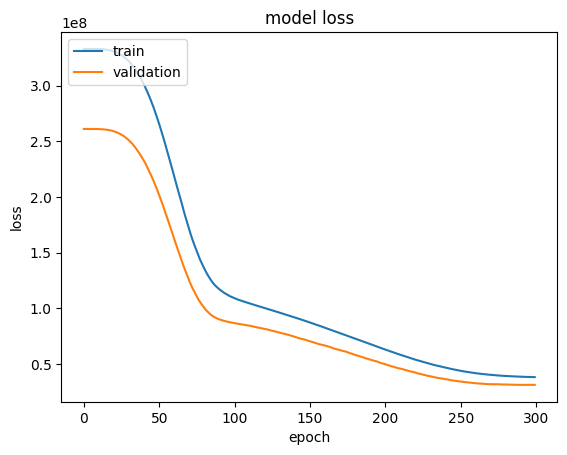

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [87]:
preds = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [88]:
predictions = pd.DataFrame(preds)
actual = pd.DataFrame(y_test)
predictions.head()

,0
0,8589.609375
1,11896.921875
2,10969.935547
3,5645.411621
4,34005.375000


In [89]:
actual.head()

,expenses
834,5377.46
371,12029.29
230,7443.64
406,4185.10
488,48885.14
